# Flight Price Prediction
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

## Importing dataset

1. Since data is in form of excel file we have to use pandas read_excel to load the data
2. After loading it is important to check the complete information of data as it can indication many of the hidden infomation such as null values in a column or a row
3. Check whether any null values are there or not. if it is present then following can be done,
    1. Imputing data using Imputation method in sklearn
    2. Filling NaN values with mean, median and mode using fillna() method
4. Describe data --> which can give statistical analysis

In [2]:
train_data = pd.read_csv("Data_Train FIXX.csv")

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Citilink,6/6/2022,Banyuwangi,Jakarta,BWX→ CGK,8:10,9:50,1h 40m,non-stops,No info,1353379.0
1,Citilink,6/6/2022,Banyuwangi,Bandung,BWX→ CGK →DPS→BDO,8:10,5:20,6h 45m,2 stops,No info,3058108.0
2,Citilink,6/6/2022,Banyuwangi,Bandung,BWX→ CGK →DPS→BDO,8:10,4:25:00 AM,33h 10m,2 stops,No info,3193751.0
3,Sriwijaya,6/6/2022,Banyuwangi,Bandung,BWX→ CGK →DPS→BDO,8:10,4:25:00 PM,9h 10m,2 stops,No info,3193751.0
4,Citilink,6/6/2022,Banyuwangi,Semarang,BWX → CGK → SRG,8:10,15:40,19h 30m,1 stops,No info,1850880.0


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          171 non-null    object 
 1   Date_of_Journey  171 non-null    object 
 2   Source           171 non-null    object 
 3   Destination      171 non-null    object 
 4   Route            171 non-null    object 
 5   Dep_Time         171 non-null    object 
 6   Arrival_Time     171 non-null    object 
 7   Duration         171 non-null    object 
 8   Total_Stops      171 non-null    object 
 9   Additional_Info  171 non-null    object 
 10  Price            171 non-null    float64
dtypes: float64(1), object(10)
memory usage: 14.8+ KB


In [6]:
train_data["Duration"].value_counts()

1h 5m      10
1h 10m      7
6h 50m      5
1h 30m      4
3h 50m      3
           ..
7h 20m      1
27h 20m     1
5h 40m      1
4h 10m      1
36h 25m     1
Name: Duration, Length: 119, dtype: int64

In [7]:
train_data.dropna(inplace = True)

In [8]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

---

## EDA

From description we can see that Date_of_Journey is a object data type,\
Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction

For this we require pandas **to_datetime** to convert object data type to datetime dtype.

<span style="color: red;">**.dt.day method will extract only day of that date**</span>\
<span style="color: red;">**.dt.month method will extract only month of that date**</span>

In [9]:
train_data["Journey_day"] = pd.to_datetime(train_data.Date_of_Journey, format="%d/%m/%Y").dt.day

In [10]:
train_data["Journey_month"] = pd.to_datetime(train_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month

In [11]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,Citilink,6/6/2022,Banyuwangi,Jakarta,BWX→ CGK,8:10,9:50,1h 40m,non-stops,No info,1353379.0,6,6
1,Citilink,6/6/2022,Banyuwangi,Bandung,BWX→ CGK →DPS→BDO,8:10,5:20,6h 45m,2 stops,No info,3058108.0,6,6
2,Citilink,6/6/2022,Banyuwangi,Bandung,BWX→ CGK →DPS→BDO,8:10,4:25:00 AM,33h 10m,2 stops,No info,3193751.0,6,6
3,Sriwijaya,6/6/2022,Banyuwangi,Bandung,BWX→ CGK →DPS→BDO,8:10,4:25:00 PM,9h 10m,2 stops,No info,3193751.0,6,6
4,Citilink,6/6/2022,Banyuwangi,Semarang,BWX → CGK → SRG,8:10,15:40,19h 30m,1 stops,No info,1850880.0,6,6


In [12]:
# Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.

train_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [13]:
# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time

# Extracting Hours
train_data["Dep_hour"] = pd.to_datetime(train_data["Dep_Time"]).dt.hour

# Extracting Minutes
train_data["Dep_min"] = pd.to_datetime(train_data["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
train_data.drop(["Dep_Time"], axis = 1, inplace = True)

In [14]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,Citilink,Banyuwangi,Jakarta,BWX→ CGK,9:50,1h 40m,non-stops,No info,1353379.0,6,6,8,10
1,Citilink,Banyuwangi,Bandung,BWX→ CGK →DPS→BDO,5:20,6h 45m,2 stops,No info,3058108.0,6,6,8,10
2,Citilink,Banyuwangi,Bandung,BWX→ CGK →DPS→BDO,4:25:00 AM,33h 10m,2 stops,No info,3193751.0,6,6,8,10
3,Sriwijaya,Banyuwangi,Bandung,BWX→ CGK →DPS→BDO,4:25:00 PM,9h 10m,2 stops,No info,3193751.0,6,6,8,10
4,Citilink,Banyuwangi,Semarang,BWX → CGK → SRG,15:40,19h 30m,1 stops,No info,1850880.0,6,6,8,10


In [15]:
# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

# Extracting Hours
train_data["Arrival_hour"] = pd.to_datetime(train_data.Arrival_Time).dt.hour

# Extracting Minutes
train_data["Arrival_min"] = pd.to_datetime(train_data.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
train_data.drop(["Arrival_Time"], axis = 1, inplace = True)

In [16]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,Citilink,Banyuwangi,Jakarta,BWX→ CGK,1h 40m,non-stops,No info,1353379.0,6,6,8,10,9,50
1,Citilink,Banyuwangi,Bandung,BWX→ CGK →DPS→BDO,6h 45m,2 stops,No info,3058108.0,6,6,8,10,5,20
2,Citilink,Banyuwangi,Bandung,BWX→ CGK →DPS→BDO,33h 10m,2 stops,No info,3193751.0,6,6,8,10,4,25
3,Sriwijaya,Banyuwangi,Bandung,BWX→ CGK →DPS→BDO,9h 10m,2 stops,No info,3193751.0,6,6,8,10,16,25
4,Citilink,Banyuwangi,Semarang,BWX → CGK → SRG,19h 30m,1 stops,No info,1850880.0,6,6,8,10,15,40


In [17]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time


# Assigning and converting Duration column into list
duration = list(train_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [18]:
# Adding duration_hours and duration_mins list to train_data dataframe

train_data["Duration_hours"] = duration_hours
train_data["Duration_mins"] = duration_mins

In [19]:
train_data.drop(["Duration"], axis = 1, inplace = True)

In [20]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,Citilink,Banyuwangi,Jakarta,BWX→ CGK,non-stops,No info,1353379.0,6,6,8,10,9,50,1,40
1,Citilink,Banyuwangi,Bandung,BWX→ CGK →DPS→BDO,2 stops,No info,3058108.0,6,6,8,10,5,20,6,45
2,Citilink,Banyuwangi,Bandung,BWX→ CGK →DPS→BDO,2 stops,No info,3193751.0,6,6,8,10,4,25,33,10
3,Sriwijaya,Banyuwangi,Bandung,BWX→ CGK →DPS→BDO,2 stops,No info,3193751.0,6,6,8,10,16,25,9,10
4,Citilink,Banyuwangi,Semarang,BWX → CGK → SRG,1 stops,No info,1850880.0,6,6,8,10,15,40,19,30


---

## Handling Categorical Data

One can find many ways to handle categorical data. Some of them categorical data are,
1. <span style="color: blue;">**Nominal data**</span> --> data are not in any order --> <span style="color: green;">**OneHotEncoder**</span> is used in this case
2. <span style="color: blue;">**Ordinal data**</span> --> data are in order --> <span style="color: green;">**LabelEncoder**</span> is used in this case

In [21]:
train_data["Airline"].value_counts()

Batik Air           43
Citilink            37
Lion Air            31
Super Air Jet       15
Garuda indonesia    13
Wings Air            7
Sriwijaya            6
lion air             3
wings Air            2
Batik                2
Susi Air             2
Lior Air             1
sriwijaya            1
Supet Air jet        1
lion Air             1
Citilink Air         1
Sriwjaya             1
Sriwijaya Air        1
Garuda               1
Garuda Indonesia     1
Air Asia             1
Name: Airline, dtype: int64

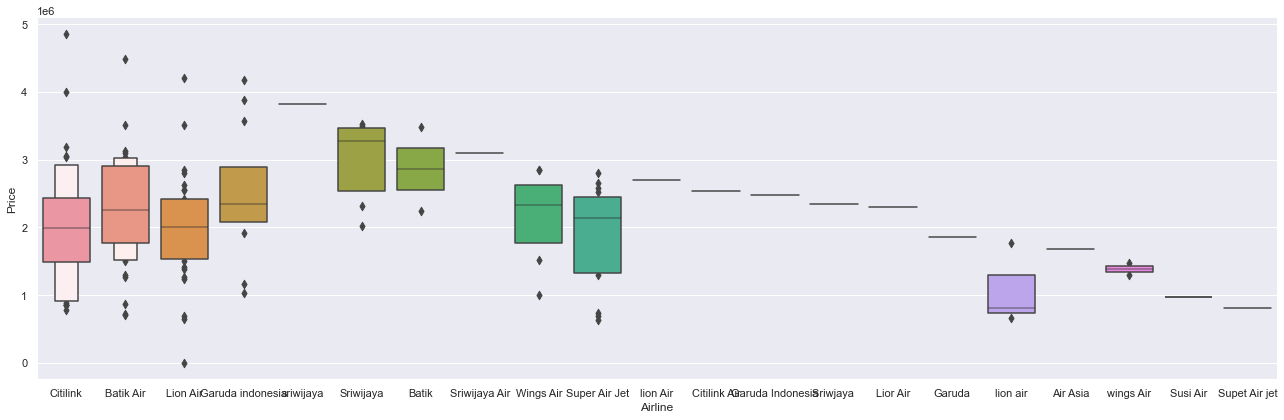

In [22]:
# From graph we can see that Jet Airways Business have the highest Price.
# Apart from the first Airline almost all are having similar median

# Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [23]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline = train_data[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

,Airline_Batik,Airline_Batik Air,Airline_Citilink,Airline_Citilink Air,Airline_Garuda,Airline_Garuda Indonesia,Airline_Garuda indonesia,Airline_Lion Air,Airline_Lior Air,Airline_Sriwijaya,Airline_Sriwijaya Air,Airline_Sriwjaya,Airline_Super Air Jet,Airline_Supet Air jet,Airline_Susi Air,Airline_Wings Air,Airline_lion Air,Airline_lion air,Airline_sriwijaya,Airline_wings Air
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [24]:
train_data["Source"].value_counts()

Jakarta         47
Semarang        36
Yogyakarta      31
Banyuwangi      25
Surabaya        11
Malang           9
Solo             7
Cilacap          3
Banyuwangi       1
Karimunjawa      1
Name: Source, dtype: int64

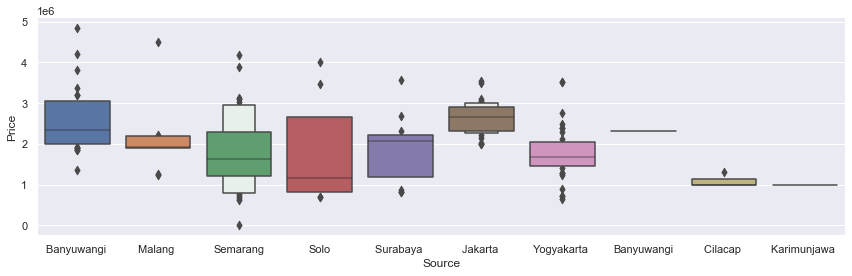

In [25]:
# Source vs Price

sns.catplot(y = "Price", x = "Source", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [26]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = train_data[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,Source_Banyuwangi,Source_Cilacap,Source_Jakarta,Source_Karimunjawa,Source_Malang,Source_Semarang,Source_Solo,Source_Surabaya,Source_Yogyakarta
0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0


In [27]:
train_data["Destination"].value_counts()

Bandung         60
Jakarta         13
Yogyakarta      13
Surabaya         9
Solo             8
Jakarta          8
Semarang         6
Semarang         6
Bandung          5
Tangerang        5
Malang           5
Sidoarjo         5
Yogyakarta       4
jawa Tengah      4
Tangerang        3
jawa Tengah      3
Banyuwangi       3
Solo             3
Surabaya         2
Jawa barat       2
Banyuwangi       2
Malang           2
Name: Destination, dtype: int64

In [28]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = train_data[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_Bandung,Destination_Banyuwangi,Destination_Banyuwangi,Destination_Jakarta,Destination_Jakarta,Destination_Jawa barat,Destination_Malang,Destination_Malang,Destination_Semarang,Destination_Semarang,Destination_Sidoarjo,Destination_Solo,Destination_Solo,Destination_Surabaya,Destination_Surabaya,Destination_Tangerang,Destination_Tangerang,Destination_Yogyakarta,Destination_Yogyakarta,Destination_jawa Tengah,Destination_jawa Tengah
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [29]:
train_data["Route"]

0               BWX→ CGK
1      BWX→ CGK →DPS→BDO
2      BWX→ CGK →DPS→BDO
3      BWX→ CGK →DPS→BDO
4        BWX → CGK → SRG
             ...        
166            YIA → BDO
167            CXP → CGK
168            CXP → SRG
169            CXP → CGK
170            KWB → SUB
Name: Route, Length: 171, dtype: object

In [30]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other

train_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [31]:
train_data["Total_Stops"].value_counts()

1 stops      110
non-stops     31
2 stops       28
3 stops        2
Name: Total_Stops, dtype: int64

In [32]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys

train_data.replace({"non-stops": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4, "1 stops": 1}, inplace = True)

In [33]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,Citilink,Banyuwangi,Jakarta,0,1353379.0,6,6,8,10,9,50,1,40
1,Citilink,Banyuwangi,Bandung,2,3058108.0,6,6,8,10,5,20,6,45
2,Citilink,Banyuwangi,Bandung,2,3193751.0,6,6,8,10,4,25,33,10
3,Sriwijaya,Banyuwangi,Bandung,2,3193751.0,6,6,8,10,16,25,9,10
4,Citilink,Banyuwangi,Semarang,1,1850880.0,6,6,8,10,15,40,19,30


In [34]:
# Concatenate dataframe --> train_data + Airline + Source + Destination

data_train = pd.concat([train_data, Airline, Source, Destination], axis = 1)

In [35]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Batik,Airline_Batik Air,Airline_Citilink,Airline_Citilink Air,Airline_Garuda,Airline_Garuda Indonesia,Airline_Garuda indonesia,Airline_Lion Air,Airline_Lior Air,Airline_Sriwijaya,Airline_Sriwijaya Air,Airline_Sriwjaya,Airline_Super Air Jet,Airline_Supet Air jet,Airline_Susi Air,Airline_Wings Air,Airline_lion Air,Airline_lion air,Airline_sriwijaya,Airline_wings Air,Source_Banyuwangi,Source_Cilacap,Source_Jakarta,Source_Karimunjawa,Source_Malang,Source_Semarang,Source_Solo,Source_Surabaya,Source_Yogyakarta,Destination_Bandung,Destination_Banyuwangi,Destination_Banyuwangi,Destination_Jakarta,Destination_Jakarta,Destination_Jawa barat,Destination_Malang,Destination_Malang,Destination_Semarang,Destination_Semarang,Destination_Sidoarjo,Destination_Solo,Destination_Solo,Destination_Surabaya,Destination_Surabaya,Destination_Tangerang,Destination_Tangerang,Destination_Yogyakarta,Destination_Yogyakarta,Destination_jawa Tengah,Destination_jawa Tengah
0,Citilink,Banyuwangi,Jakarta,0,1353379.0,6,6,8,10,9,50,1,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Citilink,Banyuwangi,Bandung,2,3058108.0,6,6,8,10,5,20,6,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Citilink,Banyuwangi,Bandung,2,3193751.0,6,6,8,10,4,25,33,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Sriwijaya,Banyuwangi,Bandung,2,3193751.0,6,6,8,10,16,25,9,10,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Citilink,Banyuwangi,Semarang,1,1850880.0,6,6,8,10,15,40,19,30,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [36]:
data_train.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [37]:
data_train.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Batik,Airline_Batik Air,Airline_Citilink,Airline_Citilink Air,Airline_Garuda,Airline_Garuda Indonesia,Airline_Garuda indonesia,Airline_Lion Air,Airline_Lior Air,Airline_Sriwijaya,Airline_Sriwijaya Air,Airline_Sriwjaya,Airline_Super Air Jet,Airline_Supet Air jet,Airline_Susi Air,Airline_Wings Air,Airline_lion Air,Airline_lion air,Airline_sriwijaya,Airline_wings Air,Source_Banyuwangi,Source_Cilacap,Source_Jakarta,Source_Karimunjawa,Source_Malang,Source_Semarang,Source_Solo,Source_Surabaya,Source_Yogyakarta,Destination_Bandung,Destination_Banyuwangi,Destination_Banyuwangi,Destination_Jakarta,Destination_Jakarta,Destination_Jawa barat,Destination_Malang,Destination_Malang,Destination_Semarang,Destination_Semarang,Destination_Sidoarjo,Destination_Solo,Destination_Solo,Destination_Surabaya,Destination_Surabaya,Destination_Tangerang,Destination_Tangerang,Destination_Yogyakarta,Destination_Yogyakarta,Destination_jawa Tengah,Destination_jawa Tengah
0,0,1353379.0,6,6,8,10,9,50,1,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,3058108.0,6,6,8,10,5,20,6,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,3193751.0,6,6,8,10,4,25,33,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,3193751.0,6,6,8,10,16,25,9,10,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1850880.0,6,6,8,10,15,40,19,30,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [38]:
data_train.shape

(171, 60)

---

---

## Feature Selection

Finding out the best feature which will contribute and have good relation with target variable.
Following are some of the feature selection methods,


1. <span style="color: purple;">**heatmap**</span>
2. <span style="color: purple;">**feature_importance_**</span>
3. <span style="color: purple;">**SelectKBest**</span>

In [43]:
data_train.shape

(171, 60)

In [44]:
data_train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Batik', 'Airline_Batik Air',
       'Airline_Citilink', 'Airline_Citilink Air', 'Airline_Garuda',
       'Airline_Garuda Indonesia', 'Airline_Garuda indonesia',
       'Airline_Lion Air', 'Airline_Lior Air', 'Airline_Sriwijaya',
       'Airline_Sriwijaya Air', 'Airline_Sriwjaya ', 'Airline_Super Air Jet',
       'Airline_Supet Air jet', 'Airline_Susi Air', 'Airline_Wings Air',
       'Airline_lion Air', 'Airline_lion air', 'Airline_sriwijaya',
       'Airline_wings Air', 'Source_Banyuwangi ', 'Source_Cilacap ',
       'Source_Jakarta ', 'Source_Karimunjawa ', 'Source_Malang ',
       'Source_Semarang', 'Source_Solo', 'Source_Surabaya ',
       'Source_Yogyakarta ', 'Destination_Bandung ', 'Destination_Banyuwangi',
       'Destination_Banyuwangi ', 'Destination_Jakarta',
       'Destination_Jakarta ', 'Destination_

In [45]:
X = data_train.loc[:, ['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Batik', 'Airline_Batik Air',
       'Airline_Citilink', 'Airline_Citilink Air', 'Airline_Garuda',
       'Airline_Garuda Indonesia', 'Airline_Garuda indonesia',
       'Airline_Lion Air', 'Airline_Lior Air', 'Airline_Sriwijaya',
       'Airline_Sriwijaya Air', 'Airline_Sriwjaya ', 'Airline_Super Air Jet',
       'Airline_Supet Air jet', 'Airline_Susi Air', 'Airline_Wings Air',
       'Airline_lion Air', 'Airline_lion air', 'Airline_sriwijaya',
       'Airline_wings Air', 'Source_Banyuwangi ', 'Source_Cilacap ',
       'Source_Jakarta ', 'Source_Karimunjawa ', 'Source_Malang ',
       'Source_Semarang', 'Source_Solo', 'Source_Surabaya ',
       'Source_Yogyakarta ', 'Destination_Bandung ', 'Destination_Banyuwangi',
       'Destination_Banyuwangi ', 'Destination_Jakarta',
       'Destination_Jakarta ', 'Destination_Jawa barat ', 'Destination_Malang',
       'Destination_Malang ', 'Destination_Semarang', 'Destination_Semarang ',
       'Destination_Sidoarjo', 'Destination_Solo', 'Destination_Solo ',
       'Destination_Surabaya', 'Destination_Surabaya ',
       'Destination_Tangerang', 'Destination_Tangerang ',
       'Destination_Yogyakarta', 'Destination_Yogyakarta ',
       'Destination_jawa Tengah', 'Destination_jawa Tengah ']]
X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Batik,Airline_Batik Air,Airline_Citilink,Airline_Citilink Air,Airline_Garuda,Airline_Garuda Indonesia,Airline_Garuda indonesia,Airline_Lion Air,Airline_Lior Air,Airline_Sriwijaya,Airline_Sriwijaya Air,Airline_Sriwjaya,Airline_Super Air Jet,Airline_Supet Air jet,Airline_Susi Air,Airline_Wings Air,Airline_lion Air,Airline_lion air,Airline_sriwijaya,Airline_wings Air,Source_Banyuwangi,Source_Cilacap,Source_Jakarta,Source_Karimunjawa,Source_Malang,Source_Semarang,Source_Solo,Source_Surabaya,Source_Yogyakarta,Destination_Bandung,Destination_Banyuwangi,Destination_Banyuwangi,Destination_Jakarta,Destination_Jakarta,Destination_Jawa barat,Destination_Malang,Destination_Malang,Destination_Semarang,Destination_Semarang,Destination_Sidoarjo,Destination_Solo,Destination_Solo,Destination_Surabaya,Destination_Surabaya,Destination_Tangerang,Destination_Tangerang,Destination_Yogyakarta,Destination_Yogyakarta,Destination_jawa Tengah,Destination_jawa Tengah
0,0,6,6,8,10,9,50,1,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,6,6,8,10,5,20,6,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,6,6,8,10,4,25,33,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,6,6,8,10,16,25,9,10,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,6,6,8,10,15,40,19,30,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [46]:
y = data_train.iloc[:, 1]
y.head()

0    1353379.0
1    3058108.0
2    3193751.0
3    3193751.0
4    1850880.0
Name: Price, dtype: float64

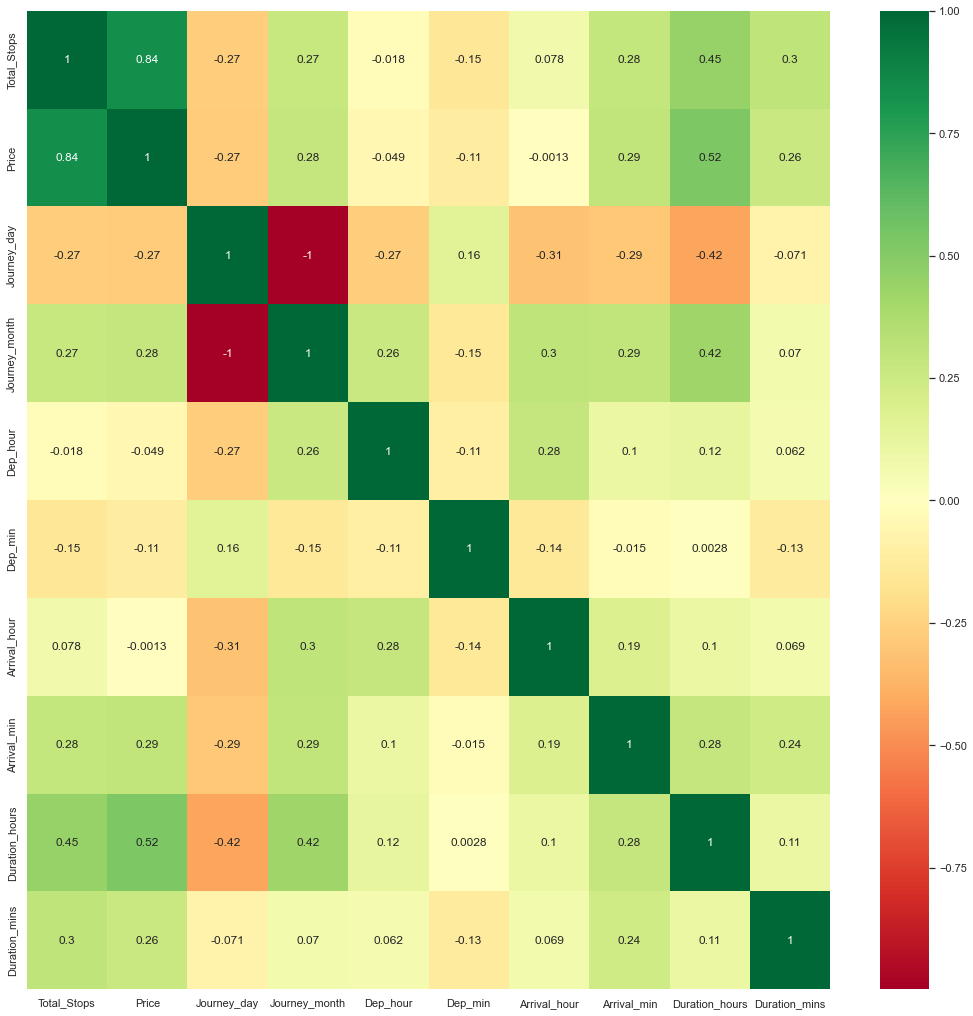

In [47]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(train_data.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [48]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [49]:
print(selection.feature_importances_)

[6.00760833e-01 2.31504342e-03 7.76261780e-04 9.85847529e-03
 5.73018411e-03 2.08895390e-02 9.93218196e-03 7.00003128e-02
 1.85759471e-02 7.46417403e-04 1.12161065e-02 2.38436998e-03
 4.69061188e-05 2.63430159e-04 1.76105379e-03 9.32533385e-03
 1.50142807e-02 3.16098488e-05 1.42850047e-02 5.56550233e-04
 1.18561320e-04 1.80672404e-03 3.91065237e-07 2.35414592e-04
 5.22699094e-04 1.45459816e-03 4.53756807e-04 3.58799194e-04
 2.57913592e-03 1.53520080e-03 4.25550972e-04 6.91977139e-02
 1.29631434e-04 3.55806105e-03 3.00321718e-03 8.85241412e-04
 2.25058160e-03 6.70289926e-03 1.52228890e-02 1.78130132e-03
 1.23118641e-03 3.86033572e-03 1.55895337e-02 4.16398403e-03
 9.47763010e-04 6.96625283e-05 3.66861353e-03 1.12296717e-02
 3.63425659e-03 3.15697254e-02 1.76720475e-03 2.18838208e-03
 5.86693282e-05 6.19591625e-04 1.08826735e-03 8.84501651e-03
 2.33924477e-03 2.52054844e-04 1.84626101e-04]


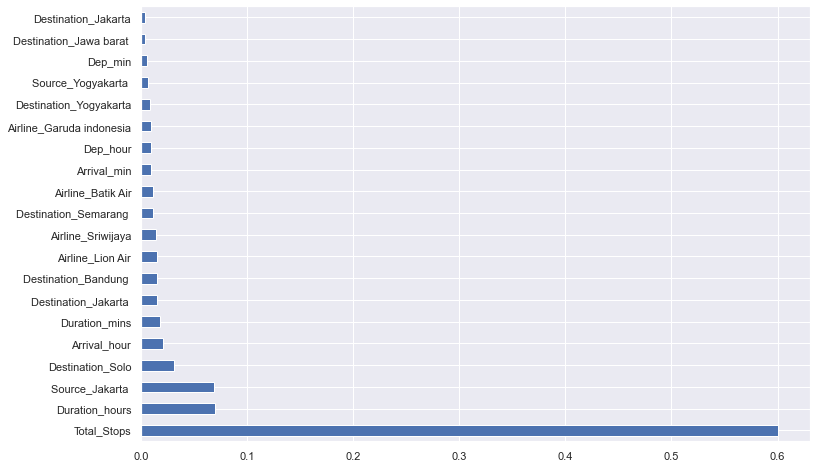

In [50]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()


---

## Fitting model using Random Forest

1. Split dataset into train and test set in order to prediction w.r.t X_test
2. If needed do scaling of data
    * Scaling is not done in Random forest
3. Import model
4. Fit the data
5. Predict w.r.t X_test
6. In regression check **RSME** Score
7. Plot graph

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [52]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [53]:
y_pred = reg_rf.predict(X_test)

In [54]:
reg_rf.score(X_train, y_train)

0.9693123213879699

In [55]:
reg_rf.score(X_test, y_test)

0.7868954887891433

C:\Users\riany\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


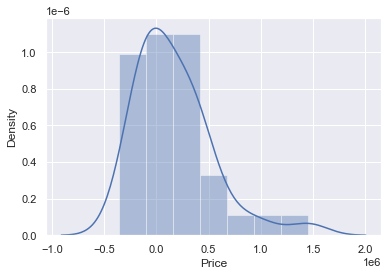

In [56]:
sns.distplot(y_test-y_pred)
plt.show()

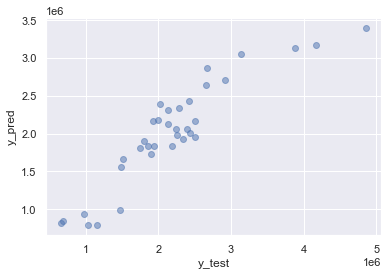

In [57]:

plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [58]:
from sklearn import metrics

In [59]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 279293.5817142858
MSE: 163345133726.5909
RMSE: 404159.7873695389


In [60]:
# RMSE/(max(DV)-min(DV))

2090.5509/(max(y)-min(y))

0.0004307871694283529

In [61]:
metrics.r2_score(y_test, y_pred)

0.7868954887891433

---

## Hyperparameter Tuning


* Choose following method for hyperparameter tuning
    1. **RandomizedSearchCV** --> Fast
    2. **GridSearchCV**
* Assign hyperparameters in form of dictionery
* Fit the model
* Check best paramters and best score

In [62]:
from sklearn.model_selection import RandomizedSearchCV

In [63]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [64]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [65]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [66]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [67]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 15}

In [68]:
prediction = rf_random.predict(X_test)

C:\Users\riany\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


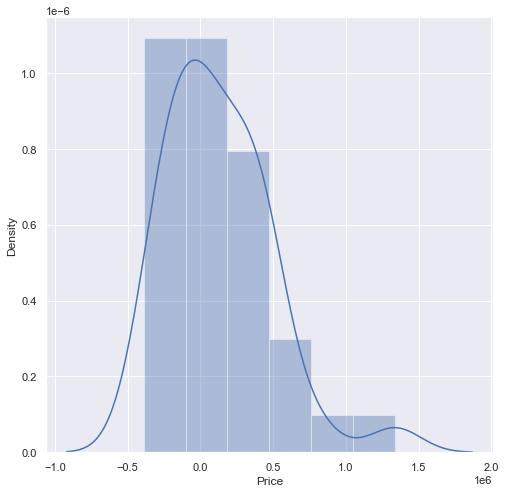

In [69]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

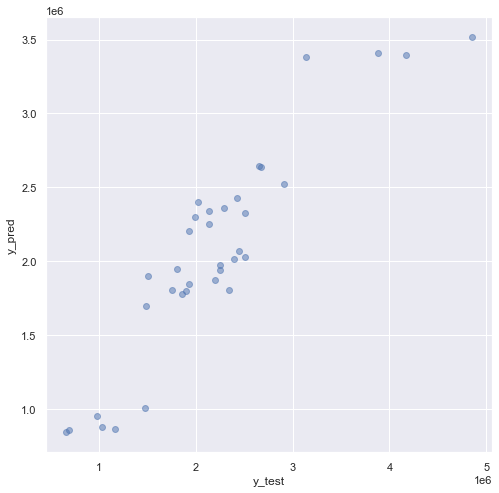

In [70]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [71]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 281016.93317029416
MSE: 141284330534.51953
RMSE: 375878.07934823696


---

## Save the model to reuse it again

In [72]:
import pickle
# open a file, where you ant to store the data
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)

In [73]:
model = open('flight_rf.pkl','rb')
forest = pickle.load(model)

In [74]:
y_prediction = forest.predict(X_test)

In [75]:
metrics.r2_score(y_test, y_prediction)

0.8156766136008216

---